In [41]:
matplotlib inline

In [42]:
from obspy.core import read
from obspy.core import UTCDateTime


In [145]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy import signal

In [43]:
st1 = read('PNIG.IG.BHZ..D.2002.065.022216.03339900.sac')
st2 = read('PNIG.IG.BHZ..D.2010.192.063930.04777200.sac')


In [44]:
print(st1)

1 Trace(s) in Stream:
IG.PNIG..BHZ | 2002-03-06T02:20:16.700000Z - 2002-03-06T02:31:16.700000Z | 20.0 Hz, 13201 samples


In [45]:
print(st2)

1 Trace(s) in Stream:
.PNIG.. | 2010-07-11T06:37:30.700000Z - 2010-07-11T06:48:30.699937Z | 20.0 Hz, 13201 samples


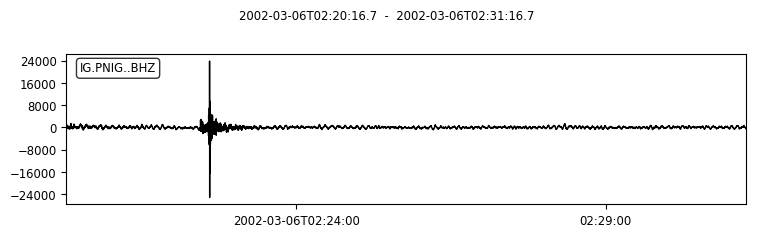

In [46]:
st1.plot()

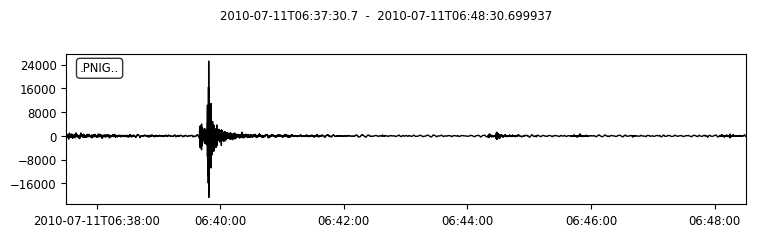

In [47]:
st2.plot()

In [115]:
dt = UTCDateTime("2002-03-06T02:22:26")
st1_cut = st1.slice(dt, dt + 25.55)

In [116]:
dt = UTCDateTime("2010-07-11T06:39:39")
st2_cut = st2.slice(dt, dt + 25.55)

In [117]:
print(st1_cut)

1 Trace(s) in Stream:
IG.PNIG..BHZ | 2002-03-06T02:22:26.000000Z - 2002-03-06T02:22:51.550000Z | 20.0 Hz, 512 samples


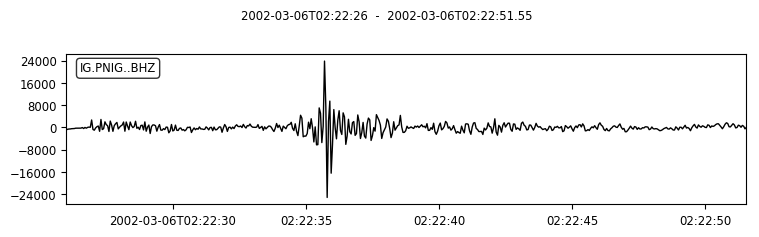

In [118]:
st1_cut.plot()

In [119]:
print(st2_cut)

1 Trace(s) in Stream:
.PNIG.. | 2010-07-11T06:39:38.999988Z - 2010-07-11T06:40:04.549985Z | 20.0 Hz, 512 samples


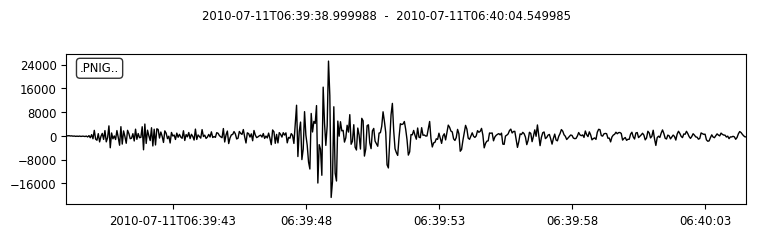

In [120]:
st2_cut.plot()

In [121]:
tr1=st1_cut[0]

In [122]:
print(tr1)

IG.PNIG..BHZ | 2002-03-06T02:22:26.000000Z - 2002-03-06T02:22:51.550000Z | 20.0 Hz, 512 samples


In [128]:
tr2=st2_cut[0]

In [131]:
print(tr2)

.PNIG.. | 2010-07-11T06:39:38.999988Z - 2010-07-11T06:40:04.549985Z | 20.0 Hz, 512 samples


In [150]:
fs=20

In [151]:
Cyx, f = mlab.cohere(tr1.data, tr2.data, Fs=fs)

In [152]:
print(Cyx)

[ 0.43172899  0.91554025  0.32399841  0.66521784  0.99645219  0.65678614
  0.64725747  0.69672607  0.88595655  0.9831807   0.9697369   0.89348182
  0.97235581  0.57094914  0.32260589  0.85049157  0.99554362  0.84263635
  0.62154454  0.75416377  0.60005818  0.49114567  0.86317822  0.96130076
  0.74046095  0.63534127  0.42381061  0.6640093   0.95845845  0.76211867
  0.86419412  0.64364116  0.74077021  0.8037047   0.54429181  0.13654959
  0.10368004  0.42025754  0.26100735  0.77621765  0.76609751  0.56630687
  0.62748564  0.52204143  0.08427984  0.3168607   0.84374846  0.594891
  0.53831234  0.67146472  0.08862698  0.35143     0.40193274  0.26945849
  0.92162072  0.79331989  0.88348112  0.58112329  0.5026872   0.65243858
  0.99489395  0.96637227  0.9388433   0.77933949  0.85064912  0.7575116
  0.48455475  0.96471163  0.99347821  0.89553876  0.91327458  0.82860551
  0.84314343  0.76355724  0.79473164  0.99805544  0.67456644  0.72997556
  0.65364655  0.7718223   0.87276757  0.91389698  0.98

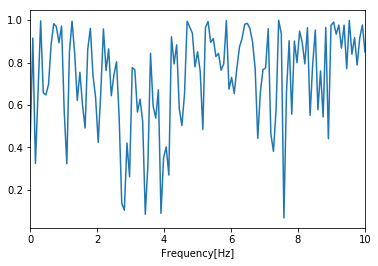

In [144]:
plt.figure()
# plt.plot(f, 10*np.log10(np.abs(FRF)))
plt.plot(f, Cyx)
plt.xlim(0, fs/2)
plt.xlabel("Frequency[Hz]")

In [149]:
f2, Cyx2 = signal.coherence(tr1.data, tr2.data, fs)

In [153]:
print(Cyx2)

[ 0.55869722  0.68221653  0.05332226  0.72885656  0.8293193   0.58953643
  0.55535215  0.44868174  0.79401612  0.72416598  0.88019007  0.9657585
  0.88235521  0.88636625  0.86122608  0.74581897  0.99211586  0.85243958
  0.83343977  0.89835364  0.7732476   0.62801534  0.93359083  0.9687525
  0.84112942  0.77298146  0.7799316   0.87956309  0.7849617   0.55276275
  0.7972877   0.90955931  0.89948446  0.69330555  0.87210643  0.90692121
  0.87925458  0.83695263  0.81885874  0.66668314  0.6834709   0.62939864
  0.06884038  0.25313589  0.52429181  0.72413141  0.6399551   0.79626131
  0.4757995   0.75187057  0.65447944  0.25599778  0.85013765  0.94466394
  0.97650611  0.89964199  0.79621077  0.57834029  0.59678441  0.81060737
  0.79494423  0.88688028  0.8501687   0.74317944  0.66304183  0.60615319
  0.3345378   0.91325307  0.97540444  0.92441374  0.96816653  0.91903132
  0.94319898  0.79048687  0.79473859  0.93886912  0.74150813  0.86070412
  0.70273012  0.82133871  0.94737673  0.87620246  0.9

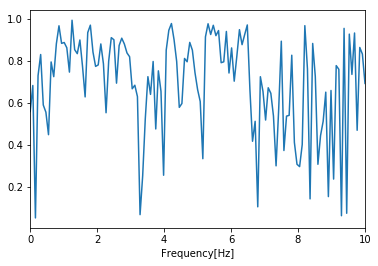

In [155]:
plt.figure()
# plt.plot(f, 10*np.log10(np.abs(FRF)))
plt.plot(f2, Cyx2)
plt.xlim(0, fs/2)
plt.xlabel("Frequency[Hz]")